In [1]:
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

# Experiment 4


In [2]:
point_width = 0.04393 *10**-1
wavelength = 635

In [3]:
def model(A, m):
    return A*m

### 39 Gauge Wire

In [4]:
distance = 52.5
uncertainty = 0.2
diameter = 8.97*10**-5

In [5]:
m1 = np.array([0.7, 0.7, 0.75])
m2 = np.array([1.2, 1.3, 1.25])
m3 = np.array([1.9, 1.9, 1.9])
m4 = np.array([2.5, 2.5, 2.5])

m=np.array([1,2,3,4])

errorbarwire = np.array([np.std(m1)/np.sqrt(3), np.std(m2)/np.sqrt(3), 0.01, 0.01])

sin = np.array([np.mean(m1)/np.sqrt(np.mean(m1)**2+distance**2), np.mean(m2)/np.sqrt(np.mean(m2)**2+distance**2), np.mean(m3)/np.sqrt(np.mean(m3)**2+distance**2), np.mean(m4)/np.sqrt(np.mean(m4)**2+distance**2)]) 




(0.0, 4.2)

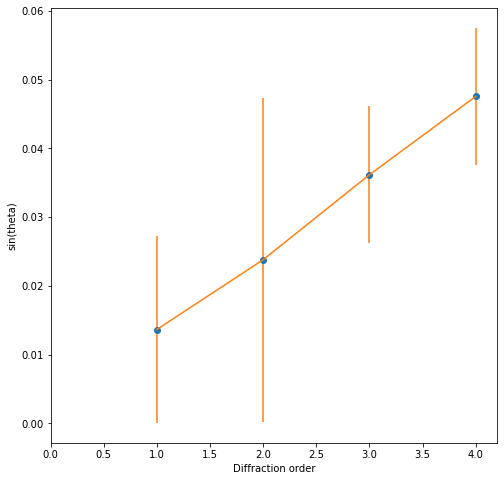

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(m, sin,'o')
ax.errorbar(m, sin, yerr = errorbarwire)
ax.set_ylabel('sin(theta)')
ax.set_xlabel('Diffraction order')
ax.set_xlim(0,4.2)

 Since $m\lambda = d\sin{\theta}$ or $\sin{\theta}= \frac{\lambda}{d}m$. As seen above, diffraction order vs $\sin{\theta}$ is a linear plot (as expected). Fitting it with the linear model:

In [7]:

popt, pcov = scipy.optimize.curve_fit(model, m, sin)
A = popt
print('best-fit parameters: ', A)
popt_uncertainties = np.sqrt(np.diag(pcov)) 
print('uncertainties for our parameters: ', popt_uncertainties) 
print('Model is A*m where x is A is', np.round(A,3), '+-', np.round(popt_uncertainties[0],3))
weights=1/np.sqrt((errorbarwire)**2)
chi_squared_reduced = (sum(weights*((wavelength*10**-9/diameter)*m - popt*m)**2))/1
print('Reduced Chi-Square', chi_squared_reduced) #degree of freedom = 3-2=1

best-fit parameters:  [0.01200054]
uncertainties for our parameters:  [0.00018186]
Model is A*m where x is A is [0.012] +- 0.0
Reduced Chi-Square 0.06644009970136305


Repeating the same analysis for the 26 Gauge Wire:

### 26 Gauge Wire

In [ ]:
distance = 300
uncertainty = 10
diameter = 4.05*10**-2

In [9]:
m1 = np.array([0.95, 0.95, 0.95])
m2 = np.array([1.85, 1.8, 1.85])
m3 = np.array([2.75, 2.75, 2.77])
m4 = np.array([3.7, 3.7, 3.7])

m=np.array([1,2,3,4])

errorbarwire = np.array([0.01, np.std(m2)/np.sqrt(3),np.std(m3)/np.sqrt(3), 0.01])

sin = np.array([np.mean(m1)/np.sqrt(np.mean(m1)**2+distance**2), np.mean(m2)/np.sqrt(np.mean(m2)**2+distance**2), np.mean(m3)/np.sqrt(np.mean(m3)**2+distance**2), np.mean(m4)/np.sqrt(np.mean(m4)**2+distance**2)]) 


(0.0, 4.2)

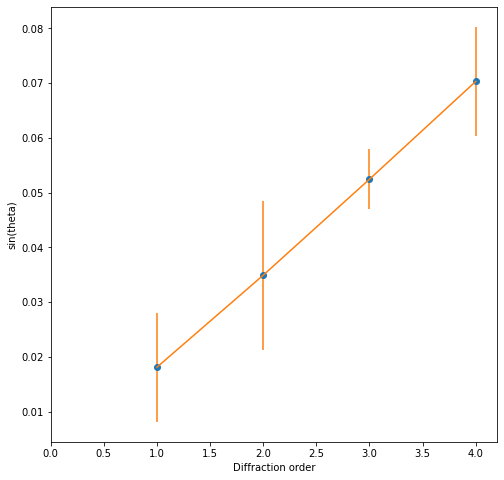

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(m, sin,'o')
ax.errorbar(m, sin, yerr = errorbarwire)
ax.set_ylabel('sin(theta)')
ax.set_xlabel('Diffraction order')
ax.set_xlim(0,4.2)

So the 26 Gauge Wire will function most like a single slit of 8 points. Following is the single slit (2 points) data:

In [12]:

popt, pcov = scipy.optimize.curve_fit(model, m, sin)
A = popt
print('best-fit parameters: ', A)
popt_uncertainties = np.sqrt(np.diag(pcov)) 
print('uncertainties for our parameters: ', popt_uncertainties) 
print('Model is A*m where x is A is', np.round(A,3), '+-', np.round(popt_uncertainties[0],3))
weights=1/np.sqrt((errorbarwire)**2)
chi_squared_reduced = (sum(weights*((wavelength*10**-9/diameter)*m - popt*m)**2))/1
print('Reduced Chi-Square', chi_squared_reduced) #degree of freedom = 3-2=1

best-fit parameters:  [0.01754685]
uncertainties for our parameters:  [6.58542902e-05]
Model is A*m where x is A is [0.018] +- 0.0
Reduced Chi-Square 0.3996489839483659
